# Hypothesentest Anzahl der Fußballtore: Frauen im Vergleich zu Männern

Es wird von einem 10% Signifikanzniveau ausgegangen, und es werden die folgenden Hypothesen verwendet:

- Nullhypothese: Die durchschnittliche Anzahl der bei internationalen Frauenfußballspielen erzielten Tore ist die gleiche wie die der Männer. 
- Alternativhypothese: Die durchschnittliche Anzahl der in internationalen Frauenfußballspielen erzielten Tore ist höher als die der Männer.

Dabei werden die Daten der offiziellen FIFA-Weltmeisterschaftsspiele (ohne Qualifikationsspiele) seit Januar 2002 ausgewertet.



In [21]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import dc_stat_think as dcst

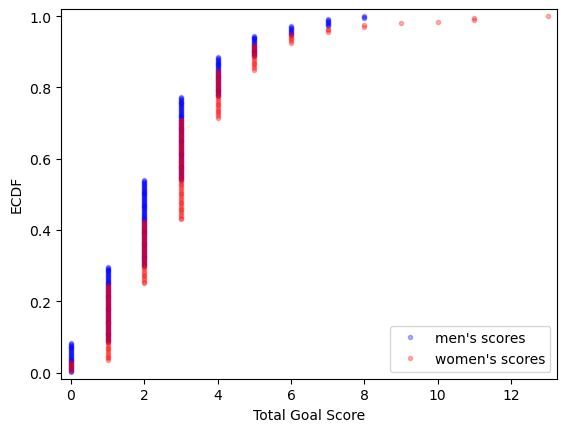

In [58]:
# Initial Graphical Exploratory Analysis

# Import data
df_m = pd.read_csv('men_results.csv')
df_w = pd.read_csv('women_results.csv')

# Parse date column 
df_m['date'] = pd.to_datetime(df_m['date']).dt.strftime('%Y-%m-%d')
df_w['date'] = pd.to_datetime(df_w['date']).dt.strftime('%Y-%m-%d')

# Slice data as per conditions
df_m = df_m[(df_m['tournament'] == "FIFA World Cup") & (df_m['date'] >= "2002-01-01")]
df_w = df_w[(df_w['tournament'] == "FIFA World Cup") & (df_w['date'] >= "2002-01-01")]

# Summarize
df_m['total_score'] = np.sum([df_m['home_score'], df_m['away_score']], axis=0)
df_w['total_score'] = np.sum([df_w['home_score'], df_w['away_score']], axis=0)

df_m_mean = np.mean(df_m['total_score'])
df_w_mean = np.mean(df_w['total_score'])

# Compute difference of means (Observed Test Statistic)
diff_of_means_observed = df_w_mean - df_m_mean

# Make x and y arrays to plot ecdf
x_m = np.sort(df_m['total_score'])
n_m = len(x_m)
y_m = np.arange(1, n_m+1)/n_m

x_w = np.sort(df_w['total_score'])
n_w = len(x_w)
y_w = np.arange(1, n_w+1)/n_w

# Plot ECDF
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue', alpha=0.3)
_ = plt.plot(x_w, y_w, marker='.', linestyle='none', color='red', alpha=0.3)
_ = plt.xlabel('Total Goal Score')
_ = plt.ylabel('ECDF')
_ = plt.legend(('men\'s scores', 'women\'s scores'), loc='lower right')
plt.margins(0.02)
plt.show()

In [72]:
# Computing p-value with Permutation Test

# Compute the means separately
df_m_mean = np.mean(df_m['total_score'])
df_w_mean = np.mean(df_w['total_score'])

# Compute difference of means (Observed Test Statistic)
diff_of_means_observed = df_w_mean - df_m_mean

# Generate replicates
perm_replicates = dcst.draw_perm_reps(df_w['total_score'], df_m['total_score'], dcst.diff_of_means, 10000)

# Compute p-value
p_val = np.sum(perm_replicates >= diff_of_means_observed)/10000

# Print p-value
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"
         
# Print output
result_dict = {"p_val": p_val, "result": result} 
print(result_dict)

{'p_val': 0.0024, 'result': 'reject'}


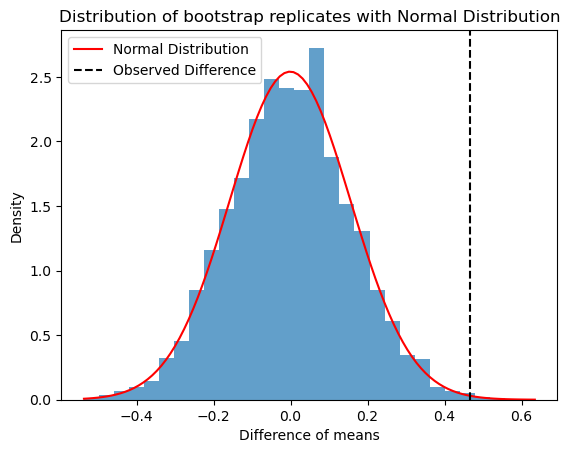

Observed difference of means: 0.47


In [85]:
# Distribution of replicates vs where the observed line falls

import scipy.stats as stats

# Plot histogram
_ = plt.hist(perm_replicates, bins=30, density=True, alpha=0.7)

# Generate x values for the normal distribution curve
x = np.linspace(np.min(perm_replicates), np.max(perm_replicates), 100)

# Compute mean and standard deviation of the bootstrap replicates
mean_reps = np.mean(perm_replicates)
std_reps = np.std(perm_replicates)

# Create normal distribution curve
normal_curve = stats.norm.pdf(x, mean_reps, std_reps)

# Plot normal distribution curve
plt.plot(x, normal_curve, color='red', label='Normal Distribution')

# Add a vertical line for the observed difference of means
plt.axvline(diff_of_means_observed, color='black', linestyle='--', label='Observed Difference')

# Label axis and add legend
plt.xlabel('Difference of means')
plt.ylabel('Density')
plt.title('Distribution of bootstrap replicates with Normal Distribution')
plt.legend()

# Display the plot
plt.show()

# Print observed difference of means value
result = round(diff_of_means_observed, 2)
result_str = "Observed difference of means: {:.2f}".format(result)
print(result_str)